In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#import feartures list
print(os.listdir('C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System'))

['.git', '.ipynb_checkpoints', 'dataset', 'KNN classifier on the KDD CUP 99 dataset.ipynb', 'KNN.ipynb', 'main.ipynb', 'main1.ipynb', 'protocol_type.png', 'README.md', 'test_accuracy_figure.png', 'test_time_figure.png', 'training_accuracy_figure.png', 'train_time_figure.png']


In [3]:
with open("C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System\\dataset\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:

cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [5]:
# Reading the ‘attack_types’ file
with open("C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System\\dataset\\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [6]:
#Creating a dictionary of attack_types
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [7]:
# adding Attack Type feature in the training dataset where attack type feature has 
# 5 distinct values i.e. dos, normal, probe, r2l, u2r.
path = "C:\\Users\\TienDat\\Documents\\GitHub\\Intrusion-Detection-System\\dataset\\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [8]:
#Shape of dataframe and getting data type of each feature
df.shape

(494021, 43)

In [9]:
#Finding missing values of all features
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [10]:

df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [11]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [12]:
#Finding missing values of all features.
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [14]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

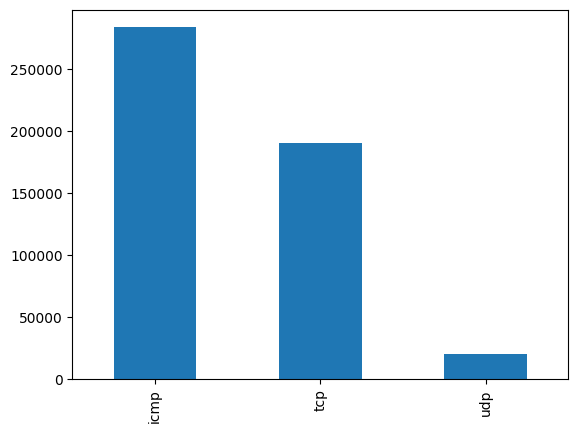

In [15]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

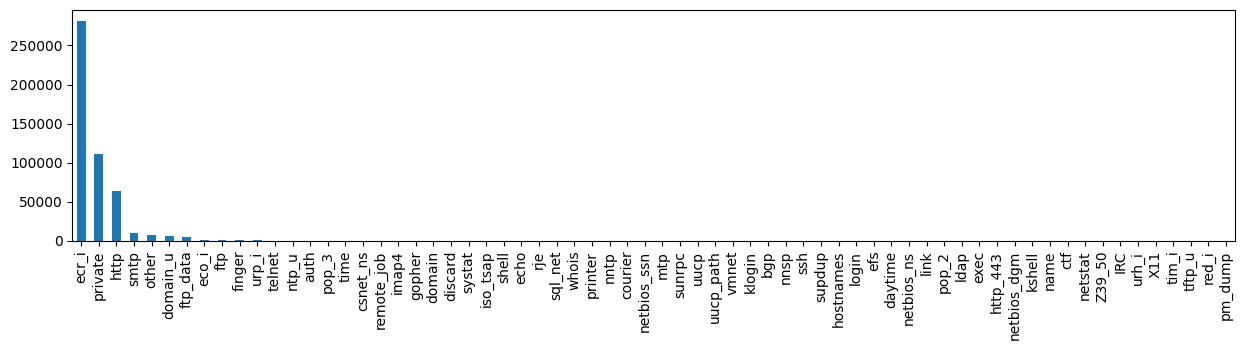

In [16]:
plt.figure(figsize=(15,3))
bar_graph('service')

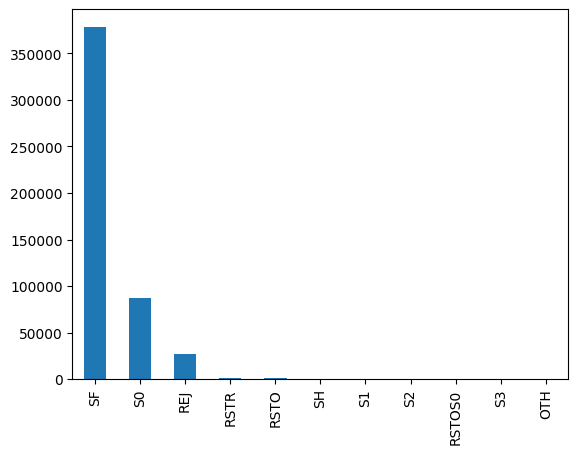

In [17]:
bar_graph('flag')

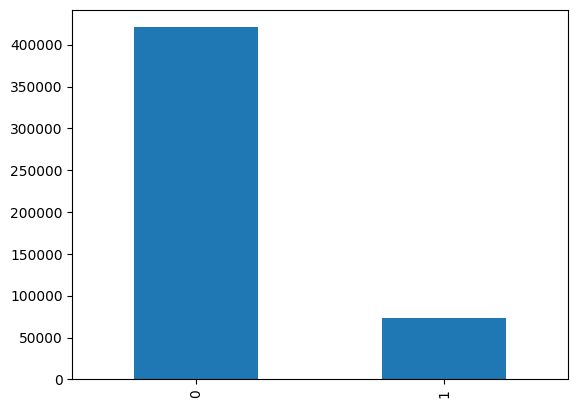

In [18]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

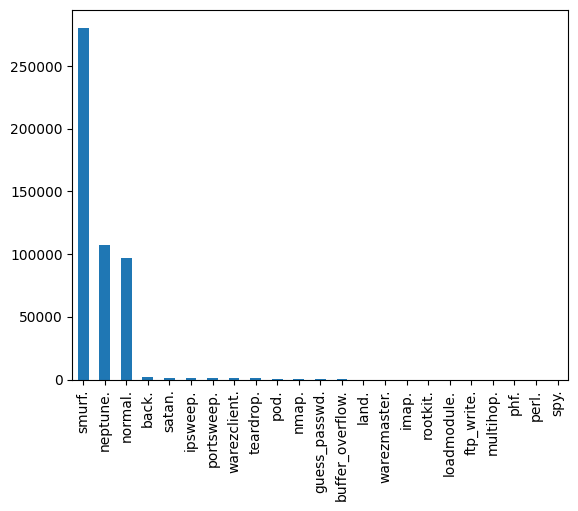

In [19]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

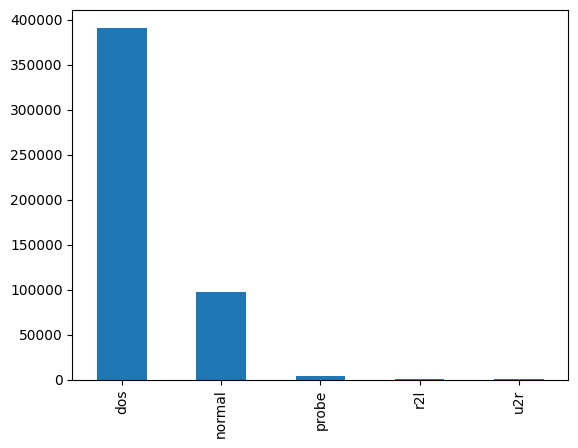

In [20]:
bar_graph('Attack Type')

In [21]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

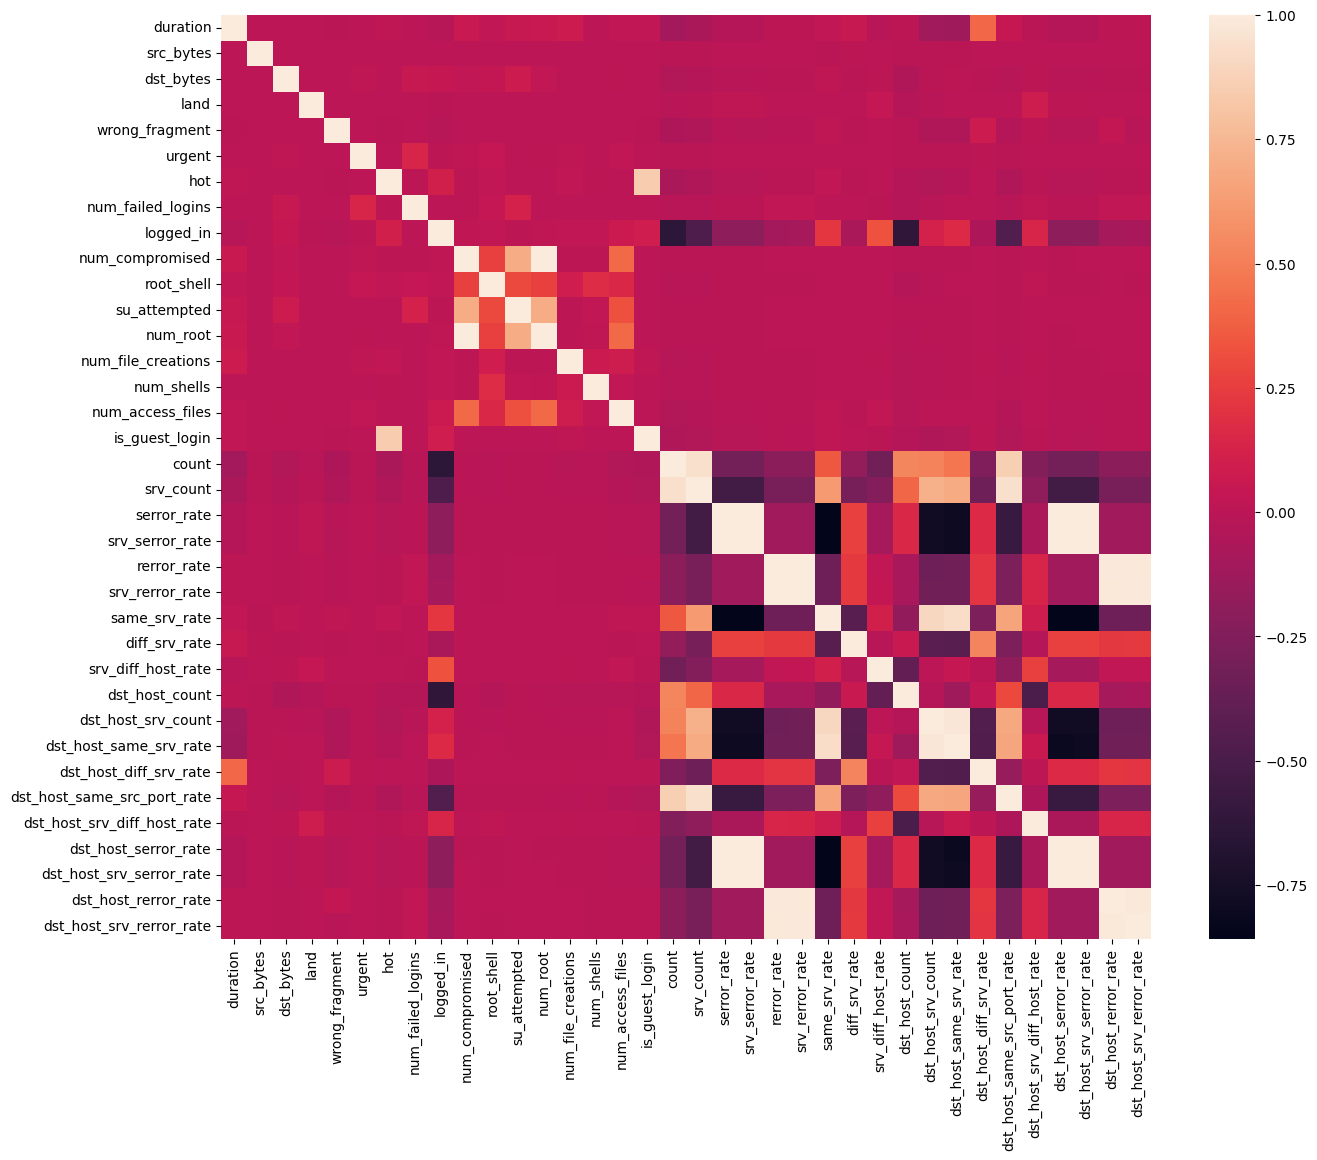

In [22]:
#Find the highly correlated variables 
# using heatmap and ignore them for analysis.
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [23]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [24]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [25]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [26]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [27]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [28]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [29]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [30]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [31]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [32]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [33]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [34]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [35]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [36]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [37]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924955924

In [38]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [41]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [42]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [43]:
df.shape

(494021, 33)

In [44]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [45]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [46]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [47]:
#Apply feature mapping on features
#such as : ‘protocol_type’ & ‘flag’
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [48]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [49]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [50]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [51]:
df.drop('service',axis = 1,inplace= True)

In [52]:
df.shape

(494021, 32)

In [53]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [54]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

MODELLING

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [56]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [57]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [58]:
model1 = GaussianNB()

In [59]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
GNB_train_time = end_time - start_time

In [60]:
print("Training time: ",GNB_train_time)


Training time:  0.42845630645751953


In [61]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
GNB_test_time = end_time - start_time

In [62]:
print("Testing time: ",GNB_test_time)

Testing time:  0.20704913139343262


In [63]:
GNB_train_score = model1.score(X_train, Y_train)
GNB_test_score = model1.score(X_test,Y_test)

In [64]:
print("Train score is:", GNB_train_score)
print("Test score is:", GNB_test_score)

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [65]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [66]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [67]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
DT_train_time = end_time - start_time

In [68]:
print("Training time: ", DT_train_time)

Training time:  1.510345220565796


In [69]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
DT_test_time = end_time-start_time

In [70]:
print("Testing time: ",DT_test_time)

Testing time:  0.02100372314453125


In [71]:
DT_train_score = model2.score(X_train, Y_train)
DT_test_score = model2.score(X_test,Y_test)

In [72]:
print("Train score is:", DT_train_score)
print("Test score is:", DT_test_score)

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model3 = RandomForestClassifier(n_estimators=30)

In [75]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
RF_train_time = end_time - start_time

In [76]:
print("Training time: ",RF_train_time)

Training time:  10.02026891708374


In [77]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
RF_test_time = end_time - start_time

In [78]:
print("Testing time: ",RF_test_time)

Testing time:  0.4441204071044922


In [79]:
RF_train_score = model3.score(X_train, Y_train)
RF_test_score = model3.score(X_test,Y_test)

In [80]:
print("Train score is:", RF_train_score)
print("Test score is:", RF_test_score)

Train score is: 0.9999788515803912
Test score is: 0.9996135609438928


SUPPORT VECTOR MACHINE

In [81]:
from sklearn.svm import SVC

In [82]:
model4 = SVC(gamma = 'scale')

In [83]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
SVM_train_time = end_time - start_time

In [84]:
print("Training time: ",SVM_train_time)

Training time:  114.39233136177063


In [85]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
SVM_test_time = end_time - start_time

In [86]:
print("Testing time: ", SVM_test_time)

Testing time:  66.34600901603699


In [87]:
SVM_train_score = model4.score(X_train, Y_train)
SVM_test_score = model4.score(X_test,Y_test)

In [88]:
print("Train score is:", SVM_train_score)
print("Test score is:", SVM_test_score)

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


LOGISTIC REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
model5 = LogisticRegression(max_iter=1200000)

In [91]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
LR_train_time = end_time - start_time

In [92]:
print("Training time: ",LR_train_time)

Training time:  36.373777866363525


In [93]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
LR_test_time = end_time - start_time

In [94]:
print("Testing time: ",LR_test_time)

Testing time:  0.02100825309753418


In [95]:
LR_train_score = model5.score(X_train, Y_train)
LR_test_score = model5.score(X_test,Y_test)

In [96]:
print("Train score is:", LR_train_score)
print("Test score is:", LR_test_score)

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


GRADIENT BOOSTING CLASSIFIER

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
model6 = GradientBoostingClassifier(random_state=0)

In [99]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
GBC_train_time = end_time - start_time

In [100]:
print("Training time: ",GBC_train_time)

Training time:  357.13141322135925


In [101]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
GBC_test_time = end_time - start_time

In [102]:
print("Testing time: ",GBC_test_time)

Testing time:  1.520341396331787


In [103]:
GBC_train_score = model6.score(X_train, Y_train)
GBC_test_score = model6.score(X_test,Y_test)

In [104]:
print("Train score is:", GBC_train_score)
print("Test score is:", GBC_test_score)

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


Artificial Neural Network

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [106]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [107]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

c:\Users\TienDat\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


In [108]:
start_time = time.time()
model7.fit(X_train, Y_train.values.ravel())
end_time = time.time()
ANN_train_time = end_time - start_time

Epoch 1/100
5172/5172 [==============================] - 7s 1ms/step - loss: 0.3120 - accuracy: 0.9258
Epoch 2/100
5172/5172 [==============================] - 7s 1ms/step - loss: 0.0818 - accuracy: 0.9845
Epoch 3/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0709 - accuracy: 0.9846
Epoch 4/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0665 - accuracy: 0.9846
Epoch 5/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0619 - accuracy: 0.9846
Epoch 6/100
5172/5172 [==============================] - 7s 1ms/step - loss: 0.0591 - accuracy: 0.9847
Epoch 7/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0574 - accuracy: 0.9847
Epoch 8/100
5172/5172 [==============================] - 7s 1ms/step - loss: 0.0561 - accuracy: 0.9847
Epoch 9/100
5172/5172 [==============================] - 6s 1ms/step - loss: 0.0552 - accuracy: 0.9847
Epoch 10/100
5172/5172 [==============================] - 6s 1ms/step - l

In [109]:
print('Training time: ',ANN_train_time)

Training time:  648.1129899024963


In [110]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
ANN_test_time = end_time-start_time

5095/5095 [==============================] - 5s 889us/step


In [111]:
print("Testing time: ", ANN_test_time)

Testing time:  6.435192584991455


In [112]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

10344/10344 [==============================] - 9s 830us/step


In [113]:
ANN_train_score = accuracy_score(Y_train,Y_train_pred7)
print("Train score: ",ANN_train_score)

Train score:  0.9988005824879


In [114]:
ANN_test_score=accuracy_score(Y_test,Y_test_pred7)
print("Test_score: ", ANN_test_score)

Test_score:  0.9986137265606311


Adaboost classifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
model8 = AdaBoostClassifier ()

In [117]:
start_time = time.time()
model8.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [118]:
AB_train_time = end_time - start_time

In [119]:
print ("Train time: ", AB_train_time)

Train time:  30.270890474319458


In [120]:
start_time = time.time()
Y_test_pred8 = model8.predict(X_test)
end_time = time.time()
AB_test_time = end_time - start_time

In [121]:
print("Testing time: ",AB_test_time)

Testing time:  1.8614330291748047


In [122]:
AB_train_score = model8.score(X_train, Y_train)
AB_test_score = model8.score(X_test,Y_test)

In [123]:
print("Train score is:", AB_train_score)
print("Test score is:", AB_test_score)

Train score is: 0.4003577104116691
Test score is: 0.400866114201942


LINEAR DISCRIMINANT

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [125]:
model9 = LinearDiscriminantAnalysis()

In [126]:
start_time = time.time()
model9.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [127]:
LDA_train_time = end_time - start_time

In [128]:
print ("Train time: ", LDA_train_time)

Train time:  1.9542324542999268


In [129]:
start_time = time.time()
Y_test_pred9 = model9.predict(X_test)
end_time = time.time()
LDA_test_time = end_time - start_time

In [130]:
print("Testing time: ",LDA_test_time)

Testing time:  0.024005651473999023


In [131]:
LDA_train_score = model9.score(X_train, Y_train)
LDA_test_score = model9.score(X_test,Y_test)

In [132]:
print("Train score is:", LDA_train_score)
print("Test score is:", LDA_test_score)

Train score is: 0.9897551013009299
Test score is: 0.989535475718746


TABLE

In [133]:
from tabulate import tabulate

In [134]:
data = [["Naive Gaussian", GNB_train_time, GNB_test_time, GNB_train_score, GNB_test_score],
        ["K-Nearest Neighbor", 2.26, 249.879, 0.9246, 0.9253],
        ["Linear Discrimiant", LDA_train_time, LDA_test_time, LDA_train_score, LDA_test_score],
        ["Decision Tree", DT_train_time, DT_test_time, DT_train_score, DT_test_score],
        ["Random Forest", RF_train_time, RF_test_time, RF_train_score, RF_test_score],
        ["Support Vector Machine", SVM_train_time, SVM_test_time, SVM_train_score, SVM_test_score],
        ["Logistic Regression", LR_train_time, LR_test_time, LR_train_score, LR_test_score],
        ["Artificial Neural Network", ANN_train_time, ANN_test_time, ANN_train_score, ANN_test_score],
        ["Gradient Boosting", GBC_train_time, GBC_test_time, GBC_train_score, GBC_test_score],
        ["AdaBoost", AB_train_time, AB_test_time, AB_train_score, AB_test_score]
        ]
colname = ["Algorithms","Train Time", "Test Time", "Train Accuracy", "Test Accuracy"] 
print(tabulate(data, headers=colname))

Algorithms                   Train Time    Test Time    Train Accuracy    Test Accuracy
-------------------------  ------------  -----------  ----------------  ---------------
Naive Gaussian                 0.428456    0.207049           0.879511         0.879038
K-Nearest Neighbor             2.26      249.879              0.9246           0.9253
Linear Discrimiant             1.95423     0.0240057          0.989755         0.989535
Decision Tree                  1.51035     0.0210037          0.990583         0.990523
Random Forest                 10.0203      0.44412            0.999979         0.999614
Support Vector Machine       114.392      66.346              0.998755         0.998792
Logistic Regression           36.3738      0.0210083          0.993529         0.993529
Artificial Neural Network    648.113       6.43519            0.998801         0.998614
Gradient Boosting            357.131       1.52034            0.99793          0.997718
AdaBoost                      30.2

TRAINING ACCURACY

<BarContainer object of 10 artists>

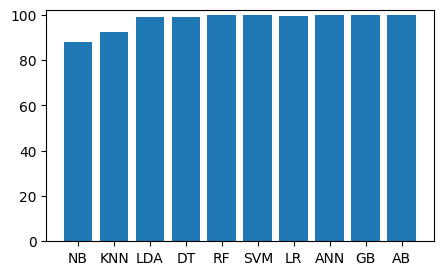

In [149]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_train_score*100,0.9246*100,LDA_train_score*100,DT_train_score*100,RF_train_score*100,SVM_train_score*100,LR_train_score*100,ANN_train_score*100,GBC_train_score*100,99.93]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.ylim(0,102)
plt.bar(names,values)

In [136]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 10 artists>

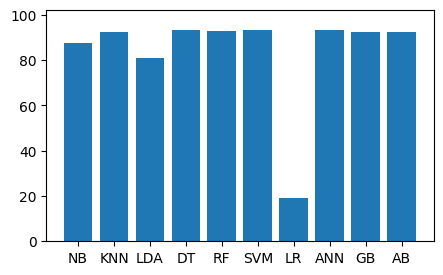

In [151]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [0.8758*100,0.9246*100,0.8116*100,0.9308*100,0.927*100,0.934*100,0.1907*100,0.935*100,0.9262*100,92.45]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.ylim(0,102)
plt.bar(names,values)

In [138]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 10 artists>

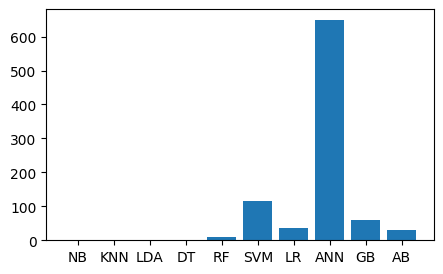

In [139]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_train_time , 2.26,LDA_train_time ,DT_train_time,RF_train_time,SVM_train_time,LR_train_time,ANN_train_time,59.635,AB_train_time]
f = plt.figure(figsize=(17,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [140]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 10 artists>

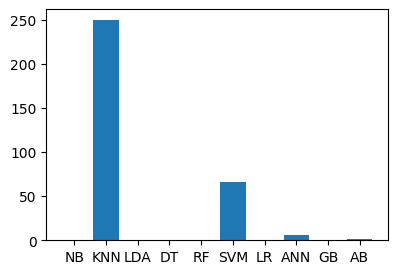

In [152]:
names = ['NB','KNN','LDA','DT','RF','SVM','LR', 'ANN','GB','AB']
values = [GNB_test_time,249.879,LDA_test_time,DT_test_time,RF_test_time,SVM_test_time,LR_test_time,ANN_test_time,0.066,AB_test_time ]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [142]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [143]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
f1_score (Y_test, Y_test_pred1, average='micro')


0.8790384414851528